<a href="https://colab.research.google.com/github/LilySaya/MachineLearning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習基礎 第2回課題
- 氏名：Saw Kay Khine Oo
- 学生番号：20B11806


In [ ]:
# California Housing Datasetを読み込む

from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()

# データセットの説明
print(dataset.DESCR)



.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
# pandasを使ってデータの概要を表示
import pandas as pd

df = pd.DataFrame(dataset.data, columns=dataset.feature_names).assign(target=dataset.target)
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


KeyboardInterrupt: ignored

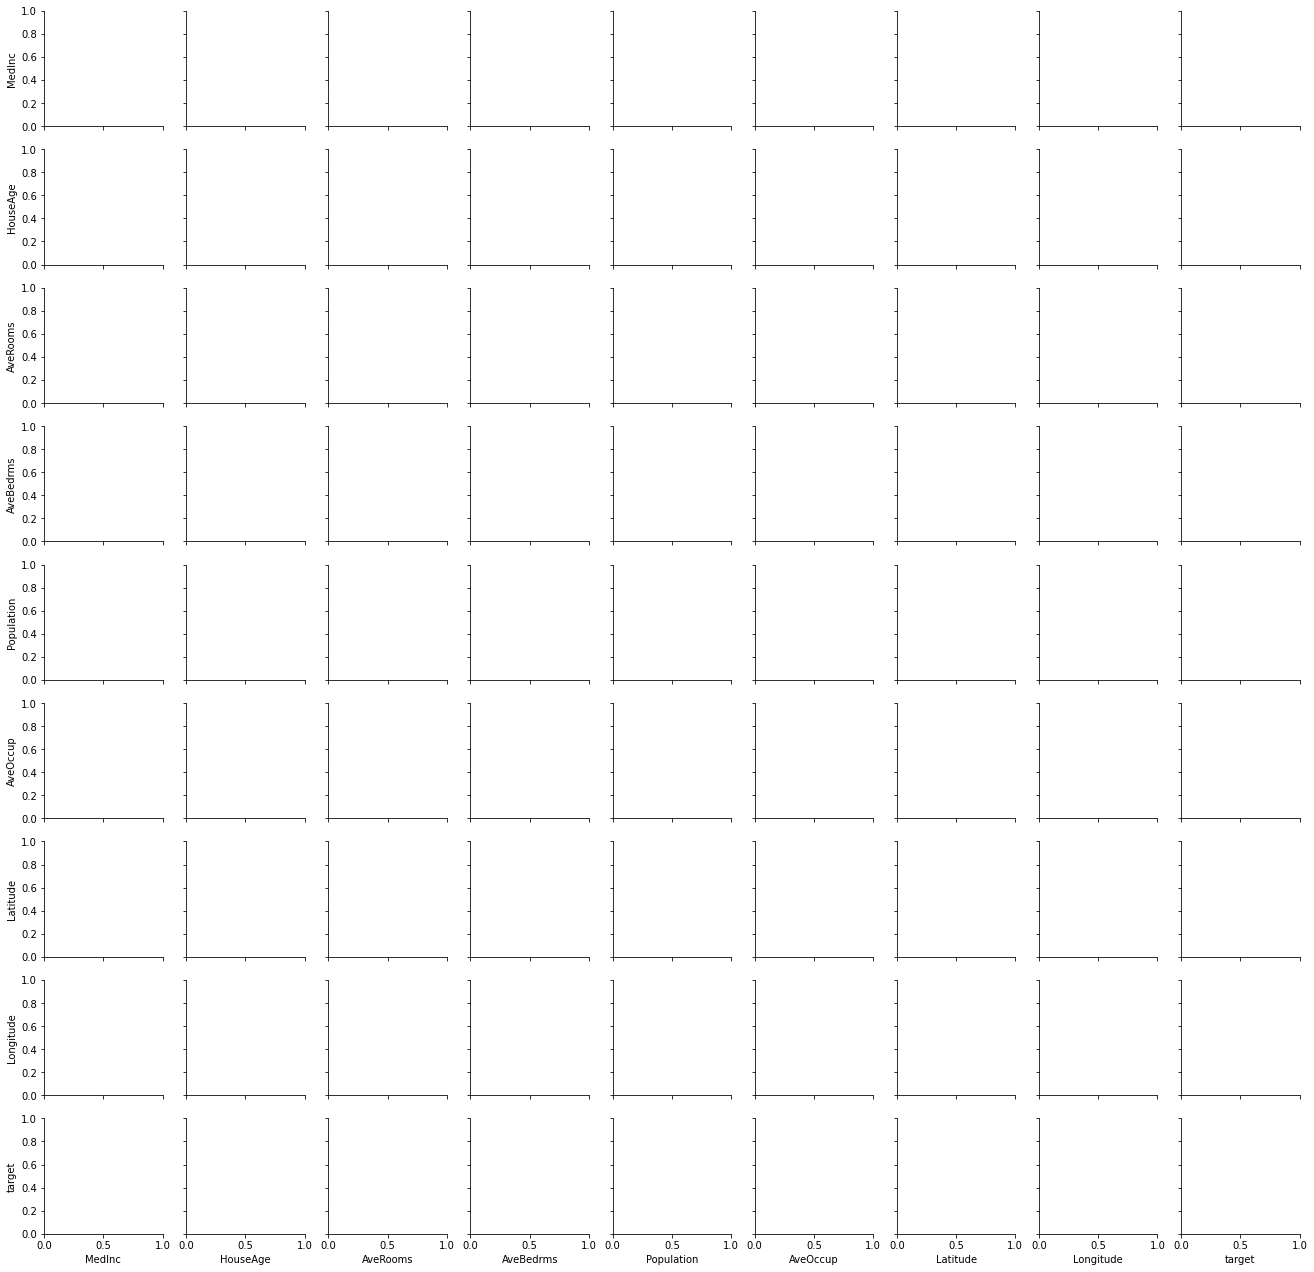

In [ ]:
# seabornを使ってデータの相関を表示
import seaborn as sns
sns.pairplot(df)


In [ ]:
# 各次元の相関係数を計算・図示

import matplotlib.pyplot as plt

df_corr = df.corr()
print(df_corr**2)
sns.heatmap(df_corr**2, annot=True, fmt='.2f', vmax=1, vmin=0, center=0.5, cmap='Blues')


Text(0.5, 1.0, 'Latitude - Longitude scatter plot')

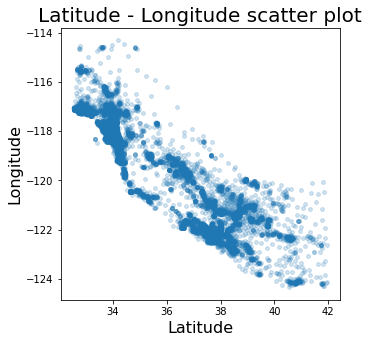

In [ ]:
# Latitute を入力 (X軸)，Longitude を出力 (Y軸) としてデータから抽出しその散布図を描く

import matplotlib.pyplot as plt

# Latitude と Longitude を選択する
x = df["Latitude"]
y = df["Longitude"]

# グラフを描画するための Figure オブジェクトと Axes オブジェクトを生成する
fig, ax = plt.subplots(figsize=(5,5))

# 散布図を描く
# 見やすい図にするため工夫すること
ax.scatter(x, y, alpha = 0.2, s = 15)

# X軸・Y軸のラベルを設定する
ax.set_xlabel("Latitude", fontsize=16)
ax.set_ylabel("Longitude", fontsize=16)
#ax.set_xlim(0,40)
#ax.set_ylim(100,150)

# グラフのタイトルを設定する
ax.set_title("Latitude - Longitude scatter plot", fontsize=20)

# （必要なら）グラフを画像として保存する
# plt.savefig("scatter.png", dpi=300)


-88.66480622263656 -0.8673388644564083


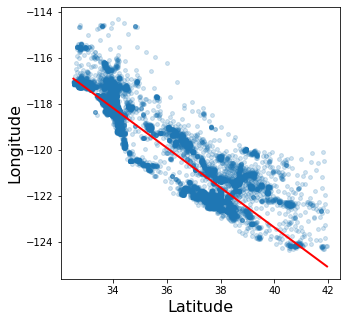

In [ ]:
# 最小二乗法による線型（一次多項式）回帰
# y = w0 + w1 * x をデータに当てはめ，w0 と w1 を求める

import statistics as st
import numpy as np

# Latitude と Longitude を選択する
x = df["Latitude"]
y = df["Longitude"]

# E[x], E[y], E[(x-E[x])^2], E[(x-E[x])*(y-E[y])] を求める
# e_x = ...
# e_y = ...
# e_x2 = ...
# e_xy = ...

# w1を求める
w1 = (st.mean(x*y)- (st.mean(x)*st.mean(y))) / (st.mean(x*x)- (st.mean(x)*st.mean(x)))

# w0を求める
w0 = st.mean(y) - w1*st.mean(x)

# 散布図を描画する
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x, y, alpha = 0.2, s = 15)

# X軸・Y軸のラベルを設定する
ax.set_xlabel("Latitude", fontsize=16)
ax.set_ylabel("Longitude", fontsize=16)

## 回帰直線を描画する
## (xの最小値, 最小値での予測値) と (xの最大値, 最大値での予測値) を結ぶ線を描画する

# xの最小値・最大値でのyの予測値を計算する
y_pred_xmin = w0 + w1 * x.min()
y_pred_xmax = w0 + w1 * x.max()

# 散布図に重ねて回帰直線を描画する
ax.plot([x.min(), x.max()], [y_pred_xmin, y_pred_xmax], linewidth=2, c='red')

# （必要なら）グラフを画像として保存する
# plt.savefig("linreg.png", dpi=300)
print(w0, w1)

In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(x.values.reshape(20640,1),y.values.reshape(20640,1))
print(linreg.coef_, linreg.intercept_)


[[-0.86733886]] [-88.66480622]


In [ ]:
# 最小二乗法による線型（2次多項式）回帰
# y = w0 + w1 * x + w2 * x^2 をデータに当てはめ，w0, w1, w2 を求める

import numpy as np

# Latitude と Longitude を選択する
x = df["Latitude"]
y = df["Longitude"]

# xの0乗，xの1乗，xの2乗をそれぞれ計算し，新たな配列Xを作成する
X = np.stack([x ** 0, x ** 1, x ** 2], axis=1)
# w = (w0, w1, w2) をXの擬似逆行列を用いて求める
w = np.linalg.pinv(X)@y


# 散布図を描画する
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x, y, alpha = 0.2, s = 15)

# X軸・Y軸のラベルを設定する
ax.set_xlabel("Latitude", fontsize=16)
ax.set_ylabel("Longitude", fontsize=16)

## 回帰曲線を描画する
## (xの最小値, 最小値での予測値) と (xの最大値, 最大値での予測値) を結ぶ線を描画する

# xの最小値から最大値までを100分割し各点で予測値を計算
x_pred = np.linspace(x.min(), x.max(), 101)
X_pred = np.stack([x_pred ** 0, x_pred ** 1, x_pred ** 2], axis=1)
print("hello")
print(np.shape(X_pred))
y_pred = X_pred @ w

# 散布図に重ねて回帰直線を描画する
ax.plot(x_pred, y_pred, linewidth=2, c='red')
print(X_pred)
print(np.shape(X))
# （必要なら）グラフを画像として保存する
# plt.savefig("linreg.png", dpi=300)


複数の次元でデータ回帰

In [ ]:
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names).assign(target=dataset.target)

x1 = df["Latitude"]
y1 = df["Longitude"]

repeat = [2,5,10]
for i in repeat:
  X1 = np.array(x1**0)
  x_pred1 = np.linspace(x1.min(), x1.max(), 101)
  X_pred1 = np.array(x_pred1**0)

  for j in range(1,i+1):
    X1 = np.append(X1,[[x1**j]])
    X_pred1 = np.append(X_pred1,[[x_pred1**j]])
    
  #X1 = np.reshape(X1,(20640,i+1)) didn't work
  X1 = np.array_split(X1,i+1) 
  X1 = np.transpose(X1)
  #X_pred1 = np.reshape(X_pred1,(101,i+1))
  X_pred1 = np.array_split(X_pred1,i+1) 
  X_pred1 = np.transpose(X_pred1)

  w1 = np.linalg.pinv(X1)@y1

  fig, ax = plt.subplots(figsize=(7,5))
  ax.scatter(x1, y1, alpha = 0.2, s = 15)
  ax.set_xlabel("random x values", fontsize=16)
  ax.set_ylabel("f(x) values", fontsize=16)
  
  y_pred1 = X_pred1 @ w1

  ax.plot(x_pred1, y_pred1, linewidth=2, c='red')


正則化含めて複数次元でのデータ回帰

In [ ]:
repeat = [1,3,5,10,20]
lamda = 20

for i in repeat:
  X = np.array(x**0)
  x_pred = np.linspace(x.min(), x.max(), 101)
  X_pred = np.array(x_pred**0)

  for j in range(1,i+1):
    X = np.append(X,[x**j])
    X_pred = np.append(X_pred,[x_pred**j])

  #X = np.reshape(X,(n,i+1)) didn't work
  X = np.array_split(X,i+1) 
  X = np.transpose(X)

  #X_pred = np.reshape(X_pred,(101,i+1)) didn't work
  X_pred = np.array_split(X_pred,i+1) 
  X_pred = np.transpose(X_pred)

  w = np.linalg.inv(np.transpose(X)@X+lamda*np.identity(i+1))@np.transpose(X)@y

  fig, ax = plt.subplots(figsize=(7,5))
  ax.scatter(x, y, alpha = 0.2, s = 15)
  #ax.set_xlim(0,11)
  #ax.set_ylim(0,180)
  ax.set_xlabel("random x values", fontsize=16)
  ax.set_ylabel("f(x) values", fontsize=16)
  
  y_pred = X_pred @ w

  ax.plot(x_pred, y_pred, linewidth=2, c='red')

In [ ]:
from google.colab import files
import re
uploaded = files.upload()
for fn in uploaded.keys():
    fn_s = re.escape(fn)
    output_fn = fn.split('.', 1)[0]+'.html'
    output_fn_s = re.escape(output_fn)
    !jupyter nbconvert --to html $fn_s
    files.download(output_fn)
    !rm $fn_s

Saving 20B11806_SawKayKhineOo_2.ipynb to 20B11806_SawKayKhineOo_2.ipynb
[NbConvertApp] Converting notebook 20B11806_SawKayKhineOo_2.ipynb to html
[NbConvertApp] Writing 472767 bytes to 20B11806_SawKayKhineOo_2.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>